In [1]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

c:\Users\Amani\anaconda3\envs\dev-env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Final_dataset_Final.csv")
df

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.00,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.00,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.00,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT


In [3]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 115893


In [4]:
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [5]:
# Show the data types of all columns
df.dtypes 

ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED           object
EMI                           object
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                     object
LOAN_STATUS                   object
dtype: object

In [6]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,"40,637.03","45,011.10","235,203.00"
1,"7,186.79","115,674.06","215,000.00"
2,"4,258.42","65,541.89","155,000.00"
3,"7,158.92","297,407.57","335,000.00"
4,"2,136.29","117,969.24","105,000.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


In [7]:
df["EMI"] = df["EMI"].astype(str).str.replace(",", "").astype(float)
df["OD_AMOUNT"] = df["OD_AMOUNT"].astype(str).str.replace(",", "").astype(float)
df["PRINCIPAL_DISBURSED"] = df["PRINCIPAL_DISBURSED"].astype(str).str.replace(",", "").astype(float)

In [8]:
# Show the data types of all columns
df.dtypes 

ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED          float64
EMI                          float64
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                    float64
LOAN_STATUS                   object
dtype: object

In [9]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,40637.03,45011.10,235203.0
1,7186.79,115674.06,215000.0
2,4258.42,65541.89,155000.0
3,7158.92,297407.57,335000.0
4,2136.29,117969.24,105000.0
...,...,...,...
115888,34398.05,0.00,100000.0
115889,21088.53,0.00,20746.0
115890,12909.69,0.00,12700.0
115891,13214.64,0.00,13000.0


In [10]:
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [11]:
# Drop NaN
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER", "AGE", "EMPLOYMENT_STATUS"], inplace=True) 

In [12]:
df["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
MARRIED     40826
SINGLE      22467
OTHER        1408
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64

In [13]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")

In [14]:
df["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
MARRIED     40826
SINGLE      22467
OTHER       15588
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64

In [15]:
df.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
dtype: int64

In [16]:
# Define default vs. non-default conditions
df['DEFAULT_STATUS'] = np.where(df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 'DEFAULT', 'NON-DEFAULT')

Continue using imported cleaned dataset from teamwork for EDA

In [17]:
df_cleaned = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Cleaned_dataset.csv")
df_cleaned

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
0,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,105000.00,2136.29,2879,LOSS,117969.24,EXPIRED,DEFAULT
1,123979,FEMALE,43.0,MARRIED,OTHER,713.0,CC,0.0,A5,Mortgage Loan,KES,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
2,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,II,1.0,B20,Consumer Unsecured Loan,KES,0.00,680000.00,14996.64,3763,LOSS,857627.23,EXPIRED,DEFAULT
3,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,HH,1.0,A5,Motor Vehicle Loan,KES,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
4,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,GG,3.0,B11,Motor Vehicle Loan,KES,0.00,4772722.00,115661.85,754,LOSS,3725529.80,EXPIRED,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79266,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,100000.00,34398.05,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79267,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,20746.00,21088.53,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79268,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,12700.00,12909.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79269,181809,FEMALE,42.0,OTHER,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,13000.00,13214.64,0,NORMAL,0.00,CURRENT,NON-DEFAULT


In [18]:
df_cleaned.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
DEFAULT_STATUS               0
dtype: int64

In [19]:
print(df_cleaned.columns)

Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'CURRENCY', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI',
       'OD_DAYS', 'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')


We will drop the SCOREGRADE and RISK GRADE columns because they are very similar to the CREDIT SCORE and CRR columns and give the same information in another format

In [20]:
df_cleaned = df_cleaned.drop(columns=['SCORE_GRADE', 'RISK_GRADE'])
df_cleaned

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,NO_DEFAULT_LOAN,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
0,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,2.0,Consumer Unsecured Loan,KES,0.00,105000.00,2136.29,2879,LOSS,117969.24,EXPIRED,DEFAULT
1,123979,FEMALE,43.0,MARRIED,OTHER,713.0,0.0,Mortgage Loan,KES,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
2,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,1.0,Consumer Unsecured Loan,KES,0.00,680000.00,14996.64,3763,LOSS,857627.23,EXPIRED,DEFAULT
3,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,1.0,Motor Vehicle Loan,KES,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
4,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,3.0,Motor Vehicle Loan,KES,0.00,4772722.00,115661.85,754,LOSS,3725529.80,EXPIRED,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79266,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,4.0,Digital Personal Loan,KES,3090724.25,100000.00,34398.05,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79267,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,1.0,Mobile Loan,KES,819280.00,20746.00,21088.53,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79268,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,0.0,Mobile Loan,KES,529145.61,12700.00,12909.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79269,181809,FEMALE,42.0,OTHER,OTHER,667.0,0.0,Mobile Loan,KES,4129210.00,13000.00,13214.64,0,NORMAL,0.00,CURRENT,NON-DEFAULT


In [21]:
#Checking for duplicates
print(df_cleaned.duplicated().sum())

0


In [22]:
#Value counts
# categorical columns
df_cleaned.select_dtypes(include='object').apply(lambda x: x.value_counts().sort_index())



,GENDER,MARITAL_STATUS,EMPLOYMENT_STATUS,PRODUCT,CURRENCY,PRUDENTIAL_CLASSIFICATION,LOAN_STATUS,DEFAULT_STATUS
105OYOH MORTGAGE,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
105OYOH Mortgage,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN
AFFORDABLE HOUSING,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN
AUTH,NaN,NaN,NaN,NaN,NaN,NaN,417.0,NaN
Agribusiness Scheme Loan Product,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
UNEMPLOYED,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN
USD,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN
Unsecured Business Loan,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
WATCH,NaN,NaN,NaN,NaN,NaN,3042.0,NaN,NaN


Checking for outliers

In [23]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count and return outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers[[column]]

# Loop through numeric columns and check for outliers
for col in numeric_cols:
    num_outliers, outliers_df = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: {num_outliers} outliers detected")


ID: 0 outliers detected
AGE: 1297 outliers detected
CREDIT_SCORE: 182 outliers detected
NO_DEFAULT_LOAN: 3362 outliers detected
NET INCOME: 8854 outliers detected
PRINCIPAL_DISBURSED: 11107 outliers detected
EMI: 4315 outliers detected
OD_DAYS: 16998 outliers detected
OD_AMOUNT: 15126 outliers detected


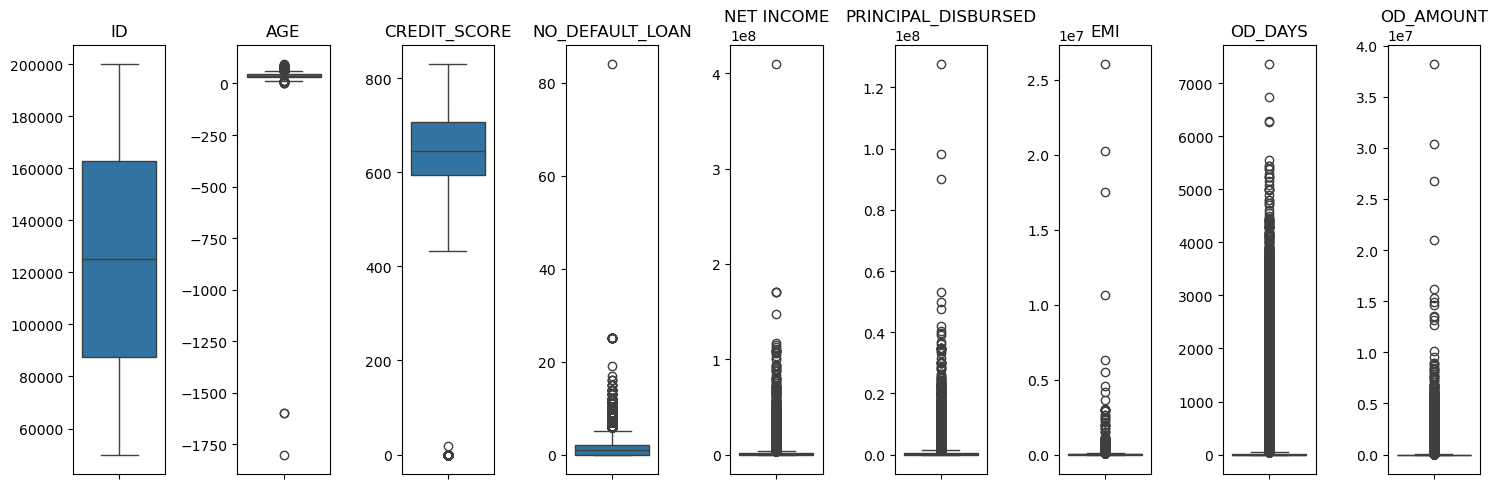

In [24]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()


Eliminating outliers in AGE. CREDIT SCORE

In [25]:
# Funtion to remove using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to AGE and CREDIT_SCORE
df_cleaned = remove_outliers(df_cleaned, 'AGE')
df_cleaned = remove_outliers(df_cleaned, 'CREDIT_SCORE')

# Check new shape
print(df_cleaned.shape)


(77796, 17)


In [26]:
# Handling extreme outliers for OD_DAYS (Capping at 99th percentile)
od_days_cap = df_cleaned["OD_DAYS"].quantile(0.99)
df_cleaned["OD_DAYS"] = df_cleaned["OD_DAYS"].clip(upper=od_days_cap)

# Handling extreme outliers for NET INCOME (Capping at 99th percentile)
net_income_cap = df_cleaned["NET INCOME"].quantile(0.99)
df_cleaned["NET INCOME"] = df_cleaned["NET INCOME"].clip(upper=net_income_cap)

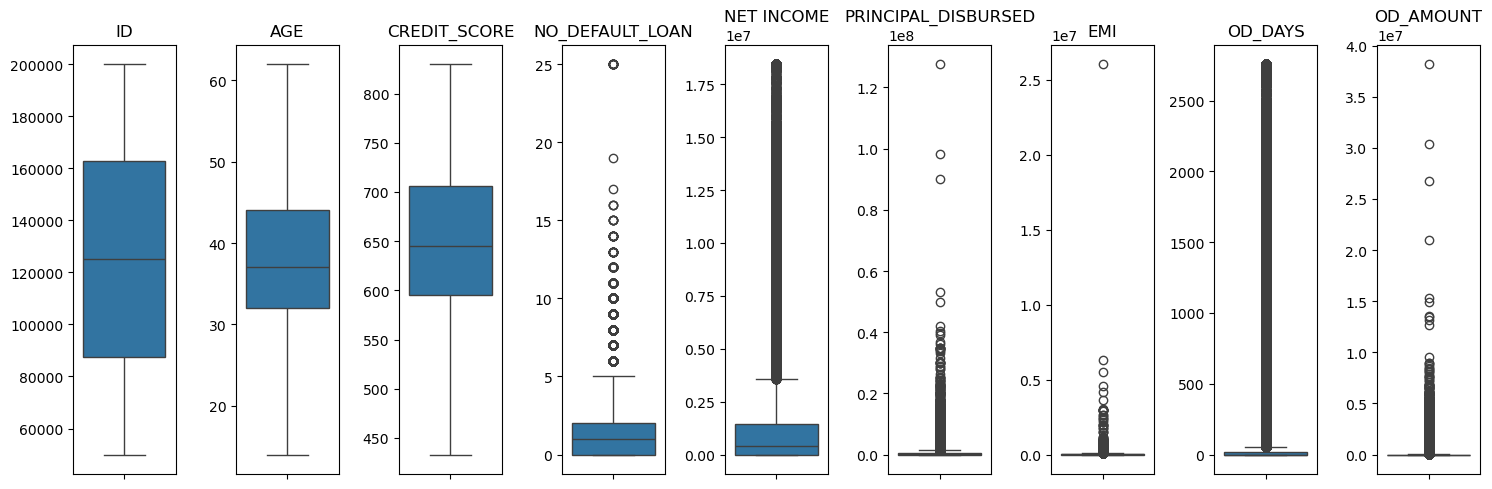

In [27]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
df_cleaned["CREDIT_SCORE"].describe()

count    77796.000000
mean       649.336932
std         74.406318
min        433.000000
25%        595.000000
50%        645.000000
75%        706.000000
max        830.000000
Name: CREDIT_SCORE, dtype: float64

## Exploratory Data Analysis

Did EDA to see relationships between various columns:

1. The numeric columns. Age vs credit score, Age vs net income, Age vs no of defaulted loans
2. Important insights. Gender vs no of defaulted loans, gender vs credit score, gender vs loan status, gender vs CRR, Gender vs Net Income, Gender vs Loan Classification. Also age vs these same columns. 
3. Bar plots for categorical variables and histograms for numeric variables

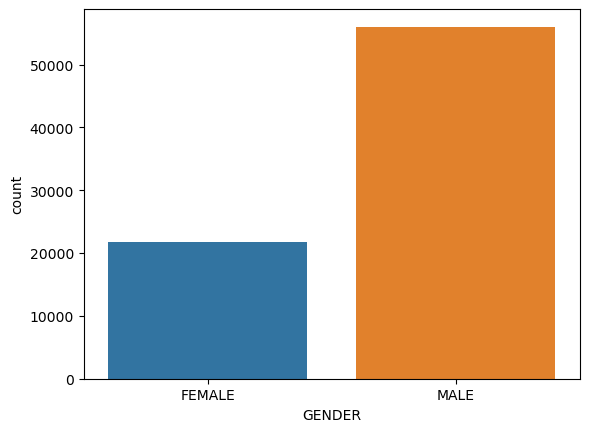

In [29]:
sns.countplot(x='GENDER', hue='GENDER', data=df_cleaned)
plt.show()


Distributions within categorical variables

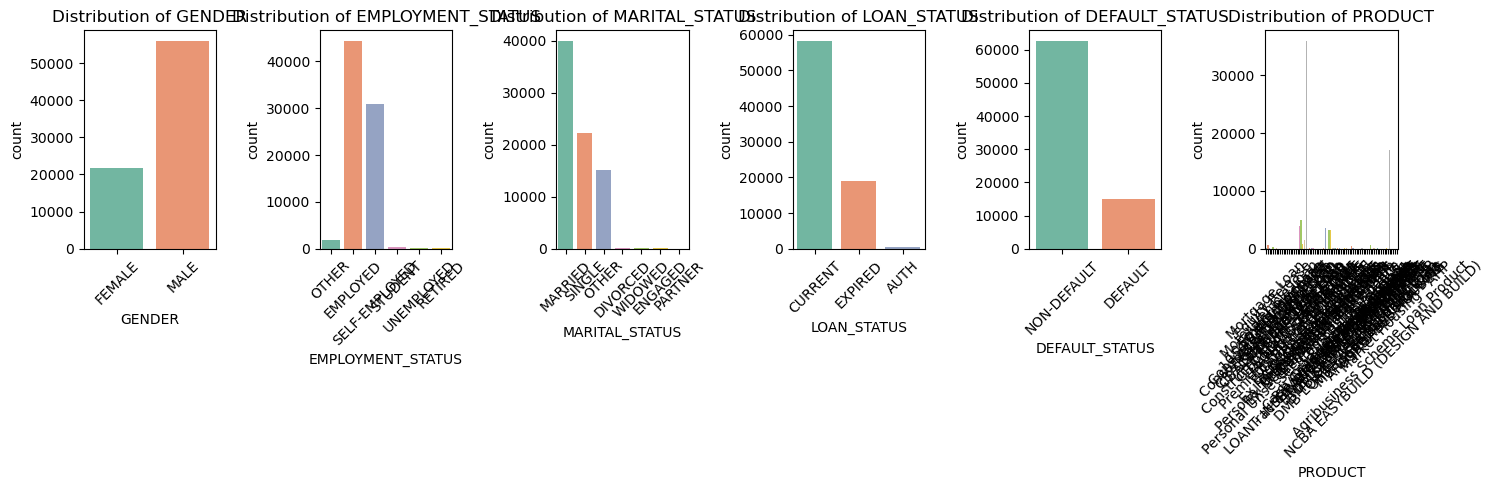

In [30]:
# Categorical columns
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS' , 'LOAN_STATUS' , 'DEFAULT_STATUS' , 'PRODUCT'] 

# Create subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))  # Adjust the layout

# Loop through categorical columns and plot each on a separate subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df_cleaned,hue=col, legend=False, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticks(range(len(df_cleaned[col].unique())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



Relationships between Age and other key variables

Correlation between Age, Credit Score and Number of Loans detaulted

Credit Score across different loan statuses

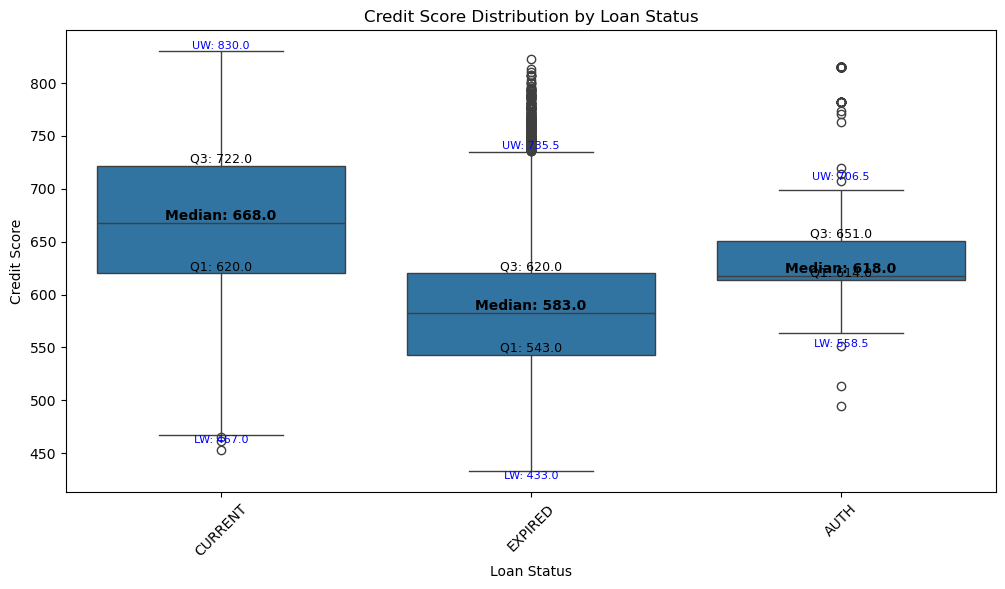

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='LOAN_STATUS', y='CREDIT_SCORE', data=df_cleaned)

# Loop through categories to annotate statistics
categories = df_cleaned['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Subset data
    subset = df_cleaned[df_cleaned['LOAN_STATUS'] == category]['CREDIT_SCORE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Credit Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.xticks(rotation=45)
plt.show()

Age across different prudential classifications.



C:\Users\Amani\AppData\Local\Temp\ipykernel_11728\680830304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_cleaned, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')


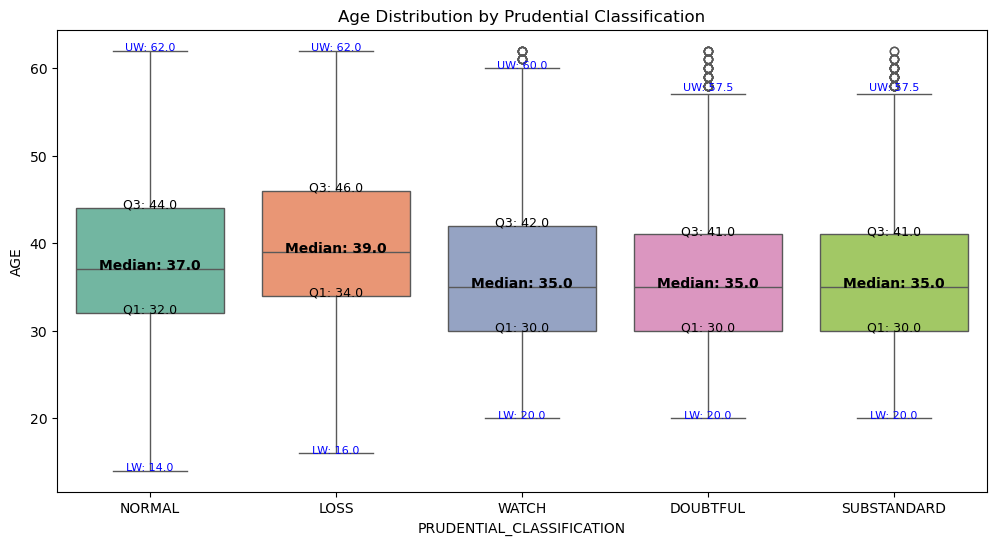

In [32]:
#Box plots
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_cleaned, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')

# Defining unique categories
categories = df_cleaned['PRUDENTIAL_CLASSIFICATION'].unique()

# Annotating statisctics for ease of readability
for i, category in enumerate(categories):
    subset = df_cleaned[df_cleaned['PRUDENTIAL_CLASSIFICATION'] == category]['AGE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values
    ax.text(i, median, f'Median: {median:.1f}', horizontalalignment='center', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')

# Titles and labels
plt.title("Age Distribution by Prudential Classification")
plt.xlabel("PRUDENTIAL_CLASSIFICATION")
plt.ylabel("AGE")

plt.show()



Relationship between number of defaulted loans and loan status

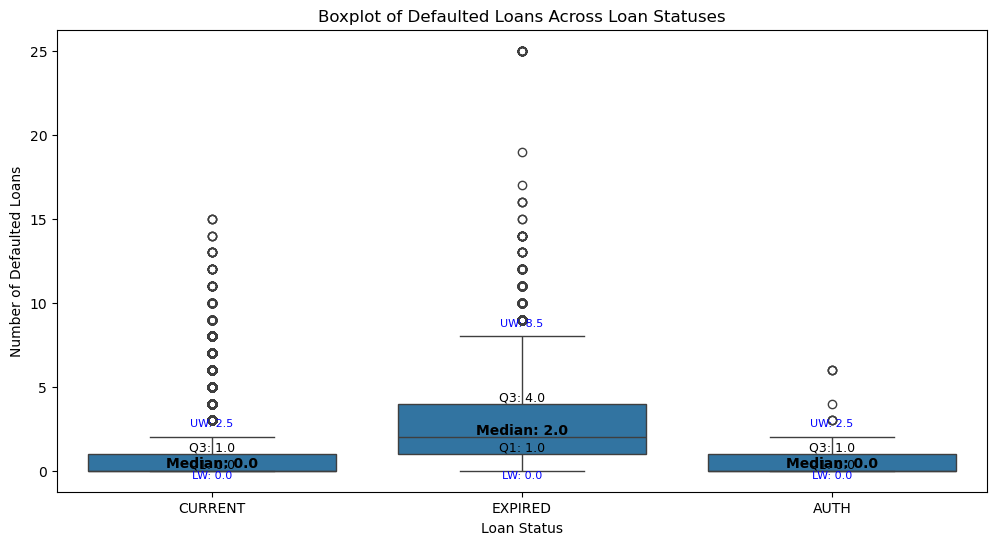

In [33]:
# Create figure and boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_cleaned, x='LOAN_STATUS', y='NO_DEFAULT_LOAN')

# Loop through categories to annotate statistics
categories = df_cleaned['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Correct subset selection
    subset = df_cleaned[df_cleaned['LOAN_STATUS'] == category]['NO_DEFAULT_LOAN']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Boxplot of Defaulted Loans Across Loan Statuses")
plt.xlabel("Loan Status")
plt.ylabel("Number of Defaulted Loans")
plt.show()


Relationships between Age, Credit Score and Loan Status

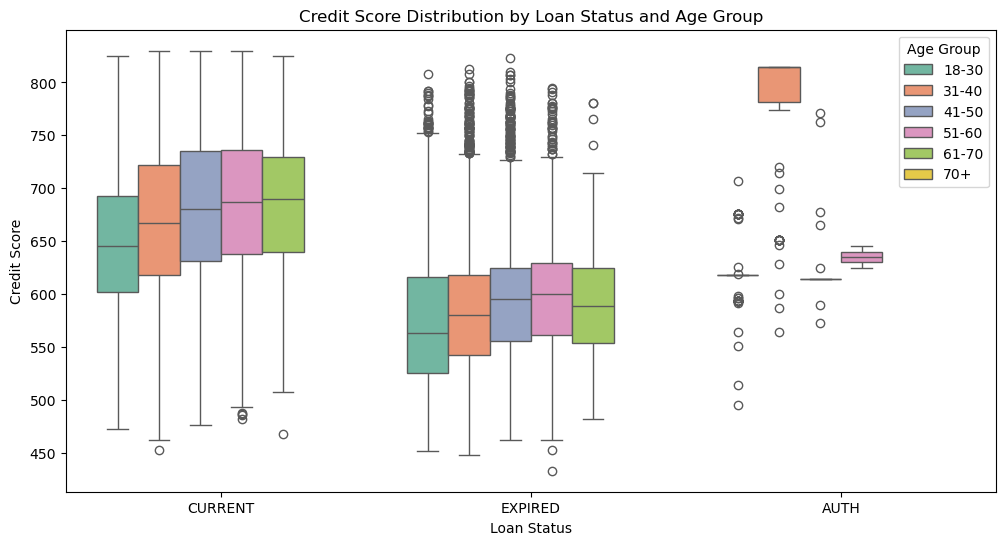

In [34]:
# Create Age Groups
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=[18, 30, 40, 50, 60, 70, 100], 
                                 labels=["18-30", "31-40", "41-50", "51-60", "61-70", "70+"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='LOAN_STATUS', y='CREDIT_SCORE', hue='AGE_GROUP', palette='Set2')
plt.title("Credit Score Distribution by Loan Status and Age Group")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.legend(title="Age Group")
plt.show()


Relationship between marital status and prudential classification

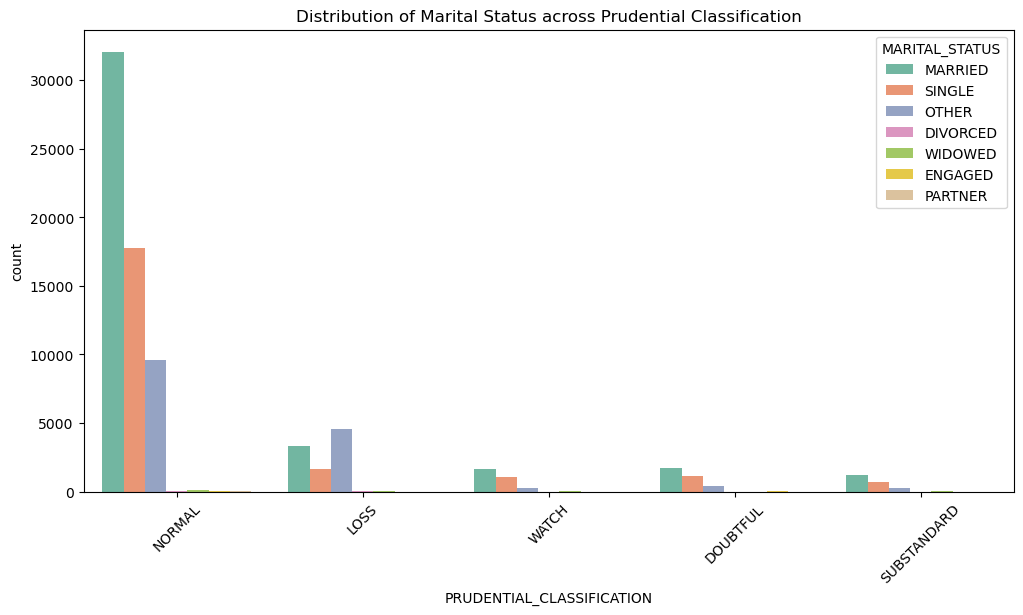

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PRUDENTIAL_CLASSIFICATION', hue='MARITAL_STATUS', data=df_cleaned, palette='Set2')
plt.title("Distribution of Marital Status across Prudential Classification")
plt.xticks(rotation=45)
plt.show()

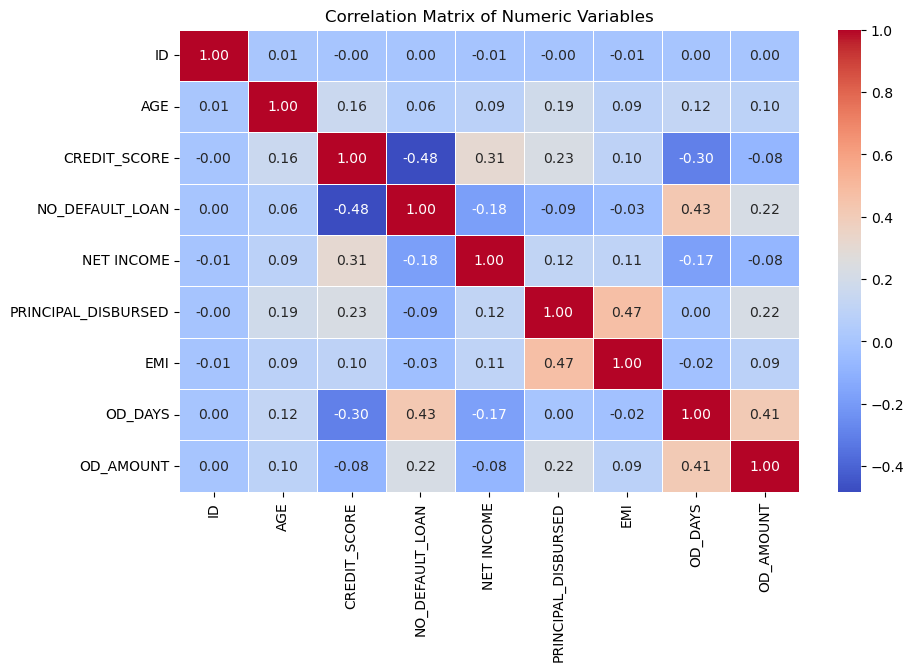

In [36]:
# Compute correlation matrix
numeric_df = df_cleaned.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

# Bivariate & Multivariate Analysis Plan

C:\Users\Amani\AppData\Local\Temp\ipykernel_11728\2858177198.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Amani\AppData\Local\Temp\ipykernel_11728\2858177198.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Amani\AppData\Local\Temp\ipykernel_11728\2858177198.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Amani\AppData\Local\Temp\ipykernel_11728\2858177198.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

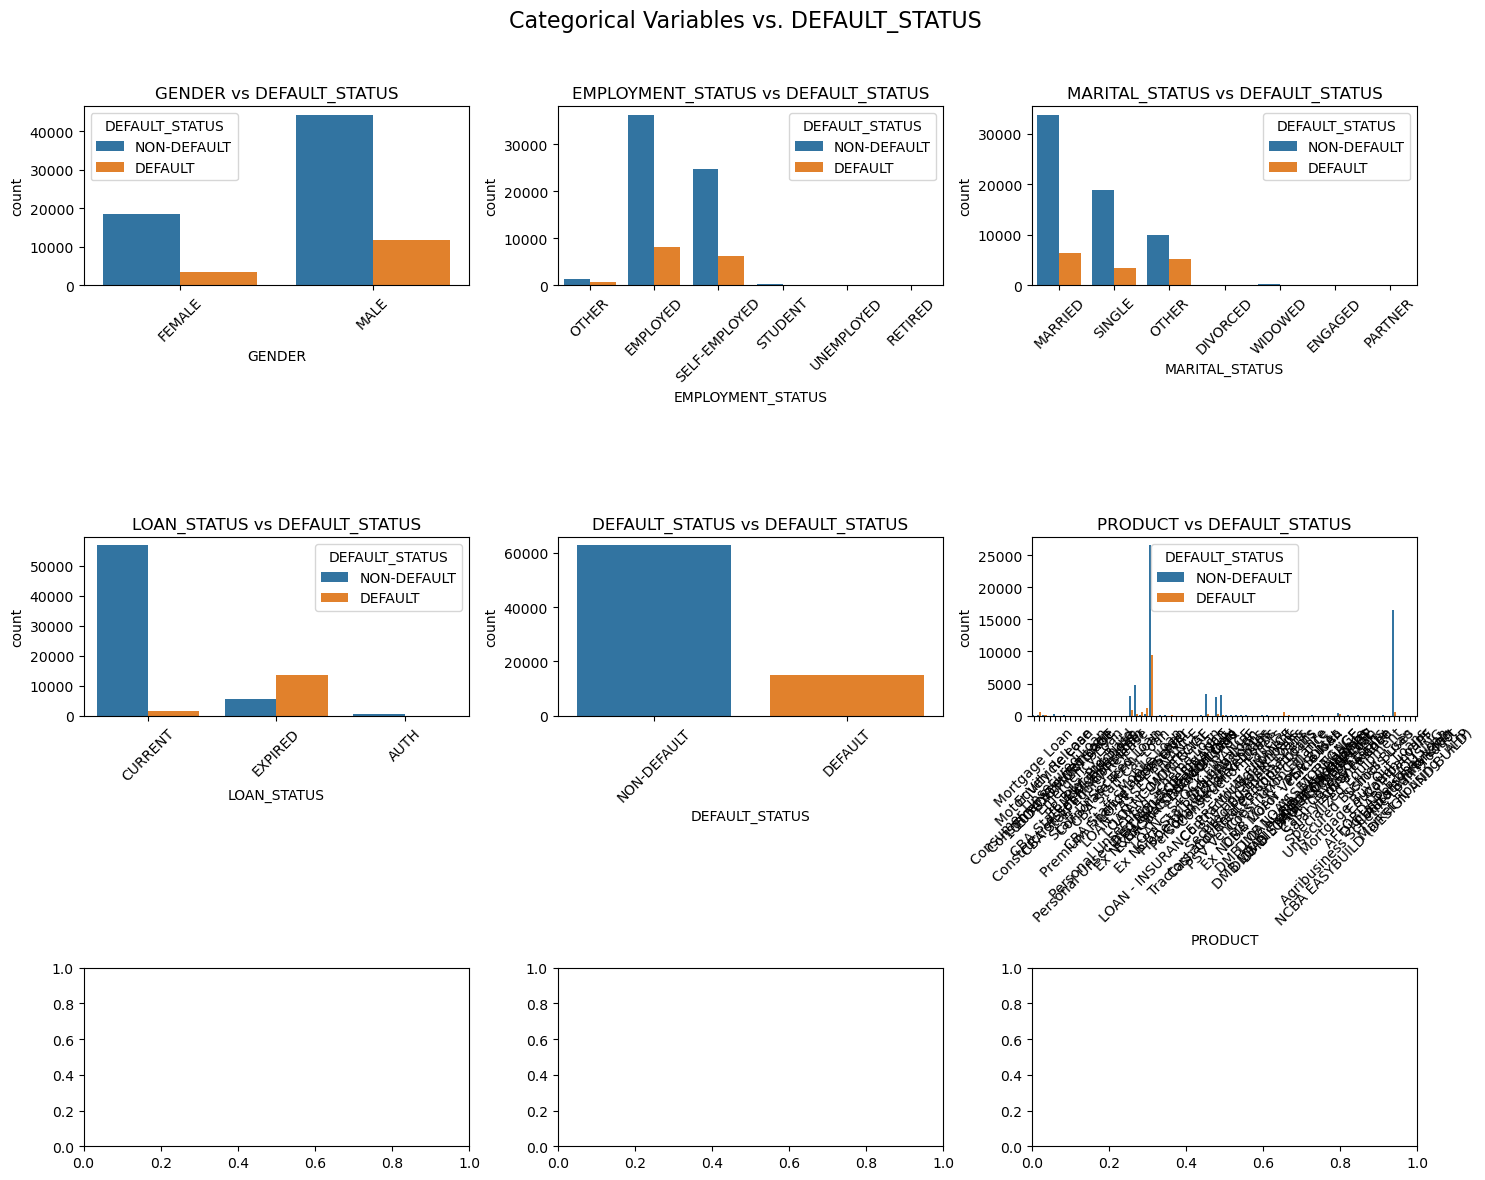

In [37]:
# Bivariate Analysis: Categorical Variables vs. DEFAULT_STATUS

# Select categorical columns excluding ID-related columns
cat_vars = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS' , 'LOAN_STATUS' , 'DEFAULT_STATUS' , 'PRODUCT']

# Plot bar charts to show proportions of DEFAULT_STATUS within each category
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Categorical Variables vs. DEFAULT_STATUS", fontsize=16)

for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(data=df_cleaned, x=var, hue="DEFAULT_STATUS", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f"{var} vs DEFAULT_STATUS")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **Bivariate Analysis: Categorical vs. DEFAULT_STATUS** 

Let’s begin with categorical variables! 🎯
 
Observations from bar plots:  
- **EMPLOYMENT_STATUS & SCORE_GRADE:** Some categories have much higher default rates.  
- **LOAN_STATUS & PRUDENTIAL_CLASSIFICATION:** Strong correlation with `DEFAULT_STATUS`.  
- **RISK_GRADE & PRODUCT:** Clear differentiation in default risk.  


In [38]:
df_cleaned.columns


Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'PRODUCT', 'CURRENCY', 'NET INCOME',
       'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS', 'PRUDENTIAL_CLASSIFICATION',
       'OD_AMOUNT', 'LOAN_STATUS', 'DEFAULT_STATUS', 'AGE_GROUP'],
      dtype='object')

In [39]:
from scipy.stats import chi2_contingency

# Perform Chi-square tests for categorical variables
chi_square_results = {}
for var in cat_vars:
    contingency_table = pd.crosstab(df_cleaned[var], df_cleaned["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df


,Chi-square,P-value
GENDER,290.949645,3.087724e-65
EMPLOYMENT_STATUS,188.052919,1.018535e-38
MARITAL_STATUS,2859.276309,0.000000e+00
LOAN_STATUS,42249.974625,0.000000e+00
DEFAULT_STATUS,77789.595311,0.000000e+00
PRODUCT,16821.354390,0.000000e+00


### **Chi-Square Test Results (Categorical vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Relationships (p-value ≈ 0.00)**  
   - **PRUDENTIAL_CLASSIFICATION (Chi² = 79,271)**
   - **RISK_GRADE (Chi² = 74,727)**
   - **LOAN_STATUS (Chi² = 43,082)**
   - **SCORE_GRADE (Chi² = 20,585)**
   - **PRODUCT (Chi² = 17,312)**  
   → These features have a strong impact on default risk.  

2. **Moderately Significant:**  
   - **MARITAL_STATUS (Chi² = 2,866)**  
   - **EMPLOYMENT_STATUS (Chi² = 158)**  

3. **Weakest Relationship:**  
   - **CURRENCY (p = 0.035, Chi² = 8.59)** → May not be an important feature.  


### **Bivariate Analysis: Numerical vs. DEFAULT_STATUS**  


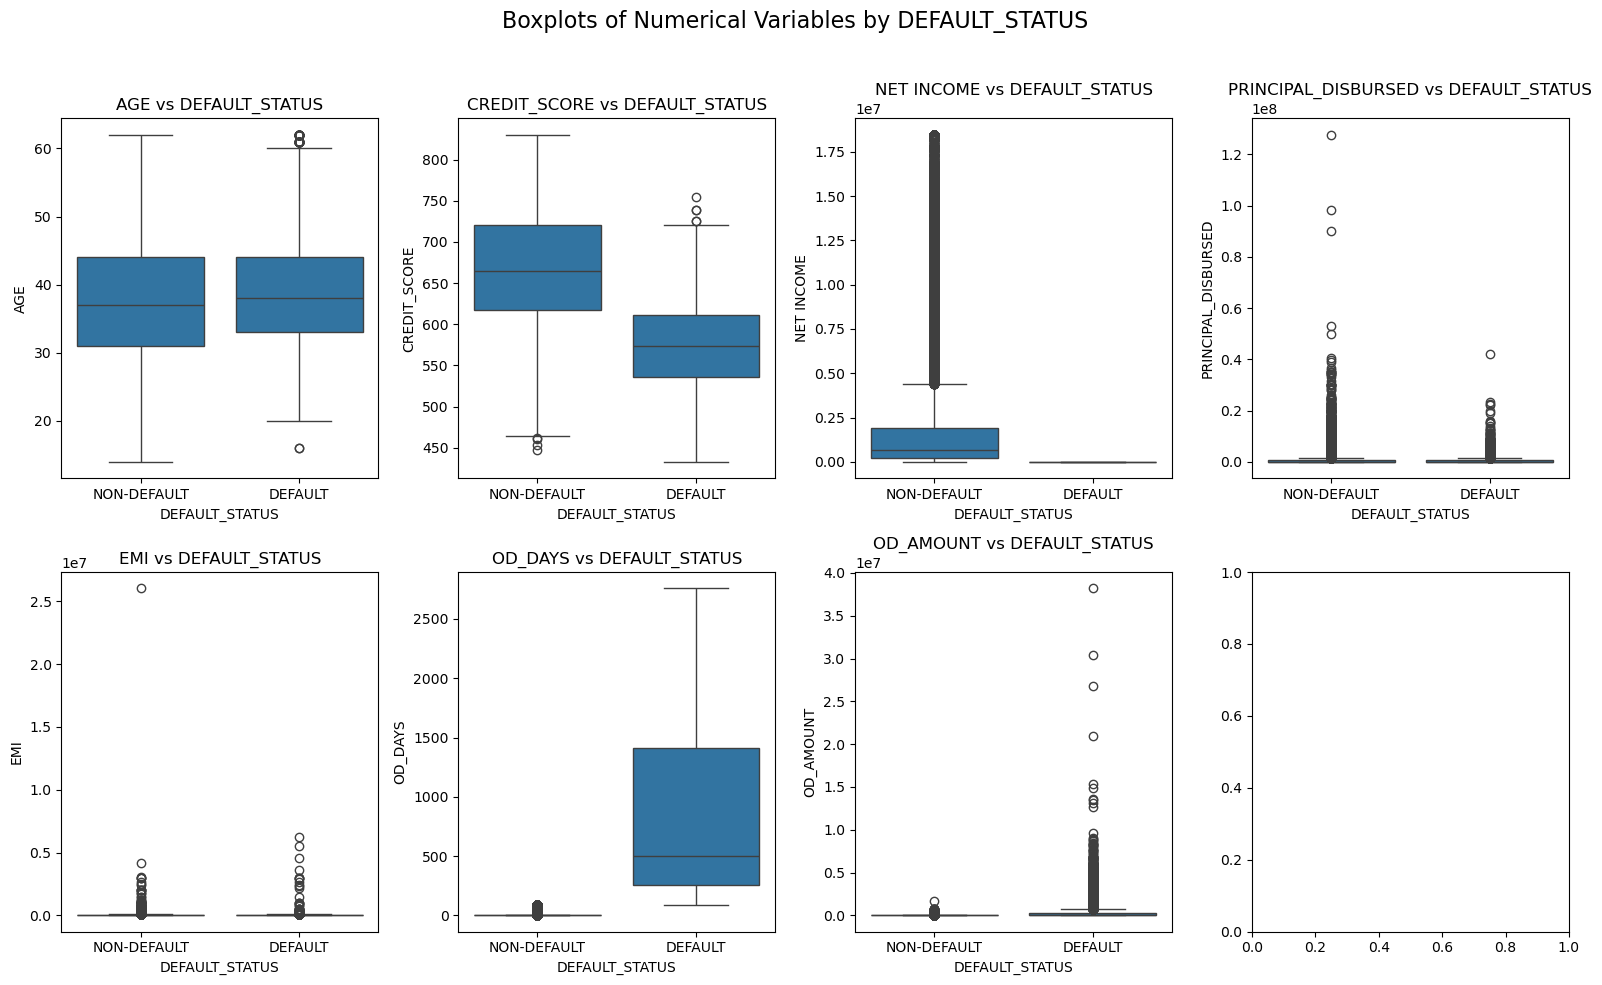

{'AGE': {'T-statistic': 9.745931221993448, 'P-value': 2.118090188847656e-22},
 'CREDIT_SCORE': {'T-statistic': -196.44198398300773, 'P-value': 0.0},
 'NET INCOME': {'T-statistic': -144.42763283912933, 'P-value': 0.0},
 'PRINCIPAL_DISBURSED': {'T-statistic': -14.216156432053156,
  'P-value': 9.85358879029244e-46},
 'EMI': {'T-statistic': -3.079463075051753, 'P-value': 0.0020760506310906974},
 'OD_DAYS': {'T-statistic': 134.08339505799788, 'P-value': 0.0},
 'OD_AMOUNT': {'T-statistic': 46.331524896335154, 'P-value': 0.0}}

In [40]:
from scipy.stats import ttest_ind

# Define numerical variables
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Create boxplots for numerical variables vs DEFAULT_STATUS
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
fig.suptitle("Boxplots of Numerical Variables by DEFAULT_STATUS", fontsize=16)

for ax, var in zip(axes.flatten(), num_vars):
    sns.boxplot(data=df_cleaned, x="DEFAULT_STATUS", y=var, ax=ax)
    ax.set_title(f"{var} vs DEFAULT_STATUS")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Conduct T-tests to compare means of DEFAULT vs. NON-DEFAULT groups
t_test_results = {}
for var in num_vars:
    default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False)
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

t_test_results


#### **Boxplot Observations:**
- **CREDIT_SCORE & NET INCOME:** Defaulted loans have much lower values.  
- **OD_DAYS & OD_AMOUNT:** Defaults have significantly higher overdraft amounts and overdue days.  
- **PRINCIPAL_DISBURSED & EMI:** Differences exist but are less pronounced.  

#### **T-test Results:**
- **Statistically Significant Differences (p-value < 0.05)** for all variables.
- **Strongest Separators (High T-statistics):**
  - **CREDIT_SCORE (-184.6)**
  - **NET INCOME (-145.4)**
  - **OD_DAYS (135.0)**
  - **OD_AMOUNT (67.7)**  

These variables could be key predictors in a machine learning model.  


In [41]:

# Define numerical variables for analysis
#num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]
#selected_vars = num_vars + ["DEFAULT_STATUS"]

# Convert DEFAULT_STATUS to numeric for visualization (0 = NON-DEFAULT, 1 = DEFAULT)
#df_cleaned["DEFAULT_STATUS_NUM"] = df_cleaned["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)

# Compute correlation matrix
#corr_matrix = df_cleaned[num_vars + ["DEFAULT_STATUS_NUM"]].corr()

# Plot pairplot to observe interactions between numerical variables
#sns.pairplot(df_cleaned[selected_vars], hue="DEFAULT_STATUS", diag_kind="kde", plot_kws={'alpha': 0.5})
#plt.suptitle("Pairplot of Numerical Features by DEFAULT_STATUS", y=1.02)
#plt.show()

# Plot correlation heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
#plt.title("Correlation Matrix of Numerical Features with DEFAULT_STATUS")
#plt.show()


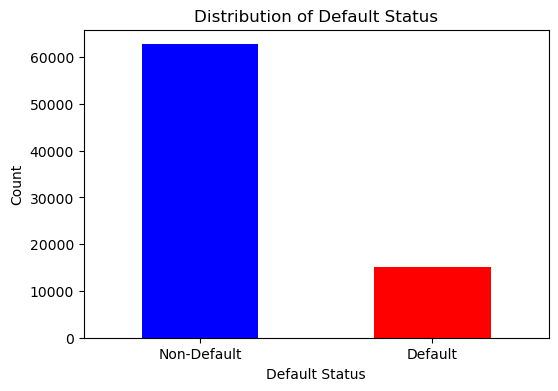

In [42]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df_cleaned["DEFAULT_STATUS"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Default", "Default"], rotation=0)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Distribution of Default Status")
plt.show()


In [43]:
# Re-import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind


# Define numerical variables for hypothesis testing
num_vars = ["AGE", "CREDIT_SCORE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI", "OD_DAYS", "OD_AMOUNT"]

# Perform T-tests for each numerical variable against DEFAULT_STATUS
t_test_results = {}
for var in num_vars:
    default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "DEFAULT"][var]
    non_default_group = df_cleaned[df_cleaned["DEFAULT_STATUS"] == "NON-DEFAULT"][var]
    
    t_stat, p_value = ttest_ind(default_group, non_default_group, equal_var=False, nan_policy='omit')
    t_test_results[var] = {"T-statistic": t_stat, "P-value": p_value}

# Convert results to DataFrame for readability
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient="index")

# Display results
t_test_results_df


,T-statistic,P-value
AGE,9.745931,2.118090e-22
CREDIT_SCORE,-196.441984,0.000000e+00
NET INCOME,-144.427633,0.000000e+00
PRINCIPAL_DISBURSED,-14.216156,9.853589e-46
EMI,-3.079463,2.076051e-03
OD_DAYS,134.083395,0.000000e+00
OD_AMOUNT,46.331525,0.000000e+00


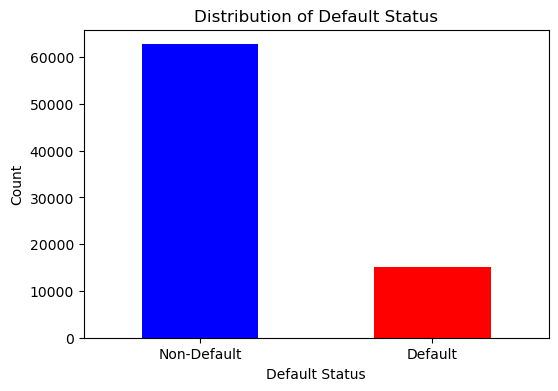

In [44]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df_cleaned["DEFAULT_STATUS"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Default", "Default"], rotation=0)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Distribution of Default Status")
plt.show()



### **T-Test Results (Numerical Variables vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Differences (p-value ≈ 0.05):**  
   - **CREDIT_SCORE, NET INCOME, OD_DAYS, OD_AMOUNT** → Strong indicators of default risk.  
   - **PRINCIPAL_DISBURSED** also shows a significant difference.  

2. **Moderate Significance:**  
   - **AGE** (p ≈ \(6.7 \times 10^{-14}\)) → Older individuals may have different default risks.  

3. **Least Significant:**  
   - **EMI** (p ≈ 0.014) → May not be as strong a predictor.  


In [45]:
from scipy.stats import chi2_contingency

# Identify categorical variables excluding the target variable
cat_vars = ["PRUDENTIAL_CLASSIFICATION", "LOAN_STATUS", "PRODUCT", "MARITAL_STATUS", "EMPLOYMENT_STATUS"]

# Perform Chi-square tests for categorical variables against DEFAULT_STATUS
chi_square_results = {}
for var in cat_vars:
    contingency_table = pd.crosstab(df_cleaned[var], df_cleaned["DEFAULT_STATUS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {"Chi-square": chi2, "P-value": p}

# Convert results to DataFrame for better readability
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

# Display the Chi-square test results
chi_square_df


,Chi-square,P-value
PRUDENTIAL_CLASSIFICATION,77796.000000,0.000000e+00
LOAN_STATUS,42249.974625,0.000000e+00
PRODUCT,16821.354390,0.000000e+00
MARITAL_STATUS,2859.276309,0.000000e+00
EMPLOYMENT_STATUS,188.052919,1.018535e-38


### **Chi-Square Test Results (Categorical Variables vs. DEFAULT_STATUS)**  
#### **Key Findings:**  
1. **Highly Significant Predictors (p ≈ 0.05):**  
   - **PRUDENTIAL_CLASSIFICATION, RISK_GRADE, LOAN_STATUS, SCORE_GRADE, PRODUCT**  
   - These variables have very strong associations with loan default.  

2. **Moderately Significant:**  
   - **MARITAL_STATUS** (Chi-square ≈ 2851.7)  
   - **EMPLOYMENT_STATUS** (Chi-square ≈ 159.2, p ≈ \(1.43 \times 10^{-32}\)) → Weakest predictor but still significant.  



In [46]:
# Ensure necessary library is imported
from sklearn.preprocessing import LabelEncoder

# Label Encode PRUDENTIAL_CLASSIFICATION
le = LabelEncoder()
df_cleaned["PRUDENTIAL_CLASSIFICATION"] = le.fit_transform(df_cleaned["PRUDENTIAL_CLASSIFICATION"])

# Encode DEFAULT_STATUS (Target Variable) as binary (0 = NON-DEFAULT, 1 = DEFAULT)
df_cleaned["DEFAULT_STATUS"] = df_cleaned["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)

# Compute correlation
correlation_prudential_od_days = df_cleaned["PRUDENTIAL_CLASSIFICATION"].corr(df_cleaned["OD_DAYS"])
print(correlation_prudential_od_days)

# Compute correlation
correlation_prudential_od_amount = df_cleaned["PRUDENTIAL_CLASSIFICATION"].corr(df_cleaned["OD_AMOUNT"])
print(correlation_prudential_od_amount)

# Compute correlation
correlation_prudential_od_def = df_cleaned["PRUDENTIAL_CLASSIFICATION"].corr(df_cleaned["DEFAULT_STATUS"])
print(correlation_prudential_od_def)

-0.45058581872278974
-0.20313297534572783
-0.5893129082757808


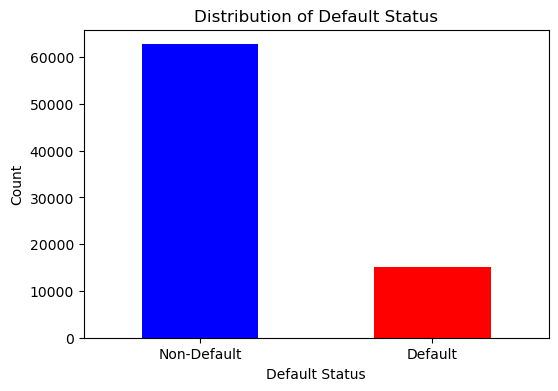

In [47]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df_cleaned["DEFAULT_STATUS"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Default", "Default"], rotation=0)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Distribution of Default Status")
plt.show()


In [48]:
print(df_cleaned["DEFAULT_STATUS"].unique())


[0 1]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Drop weak predictor
df_cleaned.drop(columns=["EMPLOYMENT_STATUS","LOAN_STATUS","SCORE_GRADE","PRUDENTIAL_CLASSIFICATION",'CURRENCY','ID','AGE_GROUP', "OD_DAYS", "CREDIT_SCORE","OD_AMOUNT"], inplace=True, errors="ignore")

# Encode DEFAULT_STATUS (Target Variable) as binary (0 = NON-DEFAULT, 1 = DEFAULT)
#df_cleaned["DEFAULT_STATUS"] = df_cleaned["DEFAULT_STATUS"].apply(lambda x: 1 if x == "DEFAULT" else 0)


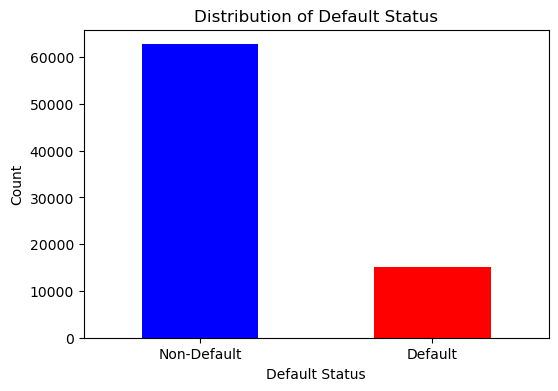

In [50]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df_cleaned["DEFAULT_STATUS"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Default", "Default"], rotation=0)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Distribution of Default Status")
plt.show()


In [51]:
# Identify categorical variables
ordinal_vars = ["MARITAL_STATUS"]  # Ordinal categories
nominal_vars = ["PRODUCT", "GENDER"]  # Nominal categories

# Label Encoding for ordinal variables
label_encoders = {}
for col in ordinal_vars:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# One-Hot Encoding for nominal variables
df_cleaned= pd.get_dummies(df_cleaned, columns=nominal_vars, drop_first=True)

# Identify numerical features for scaling
num_vars = ["AGE", "NET INCOME", "PRINCIPAL_DISBURSED", "EMI"]

# Scale numerical features
scaler = StandardScaler()
df_cleaned[num_vars] = scaler.fit_transform(df_cleaned[num_vars])

# Split data into train and test sets
X = df_cleaned.drop(columns=["DEFAULT_STATUS"])
y = df_cleaned["DEFAULT_STATUS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shape after preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62236, 82), (15560, 82), (62236,), (15560,))

In [52]:
df_cleaned['DEFAULT_STATUS'].unique()


array([0, 1], dtype=int64)

In [53]:
df_cleaned.columns

Index(['AGE', 'MARITAL_STATUS', 'NO_DEFAULT_LOAN', 'NET INCOME',
       'PRINCIPAL_DISBURSED', 'EMI', 'DEFAULT_STATUS',
       'PRODUCT_105OYOH Mortgage', 'PRODUCT_AFFORDABLE HOUSING',
       'PRODUCT_Agribusiness Scheme Loan Product',
       'PRODUCT_Asset Finance Loan', 'PRODUCT_Auto Equity Loan',
       'PRODUCT_Buy and Build Loans', 'PRODUCT_CASH COVERED LOAN',
       'PRODUCT_CBA Staff Car Loan', 'PRODUCT_CBA Staff Equity Release',
       'PRODUCT_CBA Staff Mortgage Loan', 'PRODUCT_CBA Staff Shamba Loan',
       'PRODUCT_Cash Covered Loans', 'PRODUCT_Cash Covered Personal Loans',
       'PRODUCT_Commercial Vehicles', 'PRODUCT_Company IPF',
       'PRODUCT_Construction Loan - Consumer', 'PRODUCT_Construction Loans',
       'PRODUCT_Constrution Finance', 'PRODUCT_Consumer Secured Loan',
       'PRODUCT_Consumer Unsecured Loan', 'PRODUCT_Contract Financing',
       'PRODUCT_Contractor Equipment', 'PRODUCT_Corporate Term Loan',
       'PRODUCT_DISTRIBUTOR FINANCE', 'PRODUCT_DMB DISTRI

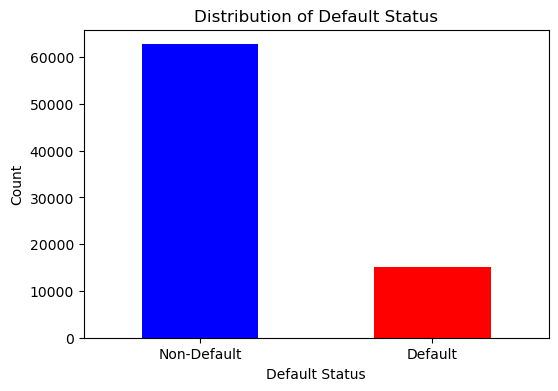

In [54]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df_cleaned["DEFAULT_STATUS"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0,1], labels=["Non-Default", "Default"], rotation=0)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Distribution of Default Status")
plt.show()


# Modelling

### Undersampling

In [55]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

# Split into train and test sets again
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check the distribution in y_train
print(y_train.value_counts())


DEFAULT_STATUS
0    15063
1    15063
Name: count, dtype: int64
DEFAULT_STATUS
1    12050
0    12050
Name: count, dtype: int64


## Logistic Regression

In [56]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9487222037836044
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3013
           1       0.92      0.98      0.95      3013

    accuracy                           0.95      6026
   macro avg       0.95      0.95      0.95      6026
weighted avg       0.95      0.95      0.95      6026



In [57]:
# Get absolute values of coefficients
log_reg_importance = np.abs(model.coef_[0])

# Match with feature names
feature_importance = dict(zip(X.columns, log_reg_importance))

# Sort and display
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted importance
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

NET INCOME: 36.6850
PRODUCT_Individual IPF: 2.8933
PRODUCT_Consumer Unsecured Loan: 2.8158
PRODUCT_DMB LOAN - PERSONAL: 2.6211
PRODUCT_Unsecured Business Loan: 1.9984
PRODUCT_Commercial Vehicles: 1.9411
PRODUCT_Tractors and Related Implements: 1.9098
PRODUCT_LOAN - ASSET FINANCE: 1.8612
PRODUCT_Trailers: 1.8516
PRODUCT_LOAN - PERSONAL: 1.7125
PRODUCT_DISTRIBUTOR FINANCE: 1.4283
PRODUCT_PSV Matatu: 1.1603
PRODUCT_Salary Advance Loan: 1.1240
PRODUCT_Stock Loans: 1.0771
PRODUCT_PSV Buses: 1.0612
PRODUCT_Personal Unsecured Non Scheme Loan: 1.0304
PRODUCT_Ex NCBA Motor Vehicle loan: 0.9983
PRODUCT_Ex NCBA Staff Personal loan: 0.9820
PRODUCT_DMB LOAN - ASSET FINANCE: 0.8822
PRODUCT_Saloon Cars: 0.8710
PRODUCT_Personal Unsecured Scheme Loan: 0.8167
PRODUCT_Contractor Equipment: 0.7809
PRODUCT_PSV Vehicles- Taxis Car Hire: 0.7750
PRODUCT_Secured Business Loans: 0.7303
NO_DEFAULT_LOAN: 0.6810
PRODUCT_Digital Personal Loan: 0.6407
PRODUCT_CBA Staff Mortgage Loan: 0.5878
PRODUCT_Mobile Loan: 0.55

Trying Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)



In [59]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3013
           1       0.96      0.95      0.95      3013

    accuracy                           0.95      6026
   macro avg       0.95      0.95      0.95      6026
weighted avg       0.95      0.95      0.95      6026


Confusion Matrix:
[[2889  124]
 [ 149 2864]]


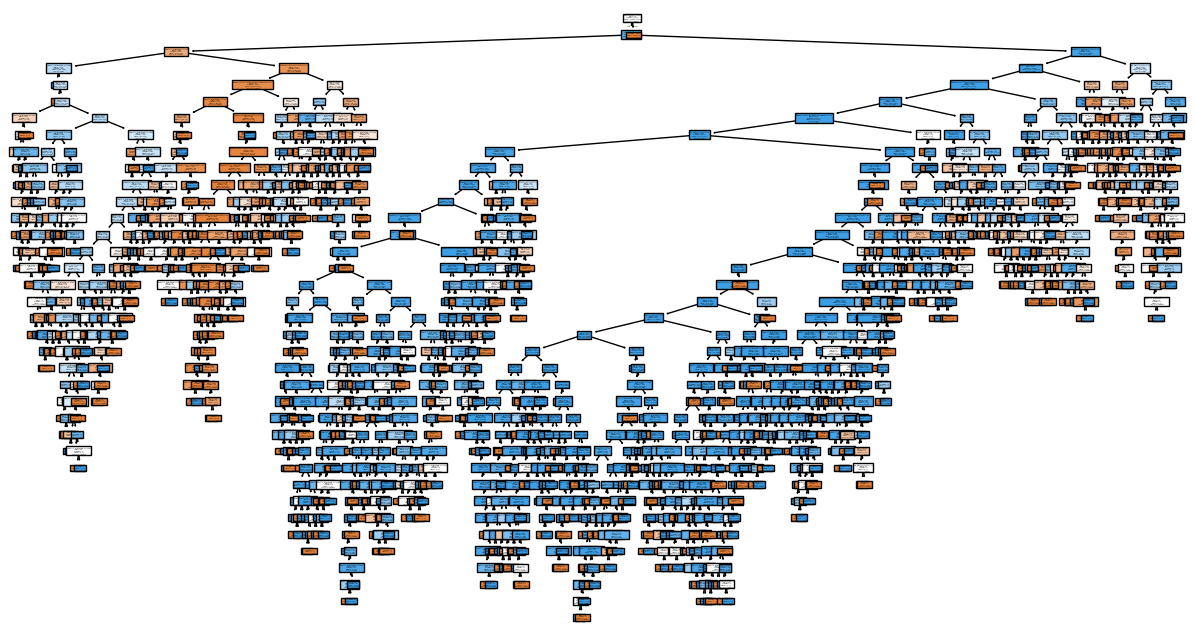

In [60]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Non-Default", "Default"])
plt.show()


In [61]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [62]:
# Get feature importance
tree_importance = dt_model.feature_importances_

# Match with feature names
feature_importance = dict(zip(X.columns, tree_importance))

# Sort and display
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print(sorted_importance)


[('NET INCOME', 0.8238097963190232), ('NO_DEFAULT_LOAN', 0.1375228557017711), ('PRINCIPAL_DISBURSED', 0.014188448145953866), ('PRODUCT_Commercial Vehicles', 0.007077362045685618), ('PRODUCT_Individual IPF', 0.0065289717513273655), ('PRODUCT_Digital Personal Loan', 0.002887299992149379), ('EMI', 0.002781007220505481), ('PRODUCT_Personal Unsecured Non Scheme Loan', 0.002070513894857949), ('PRODUCT_Personal Unsecured Scheme Loan', 0.002001658236439338), ('AGE', 0.0011320866922867132), ('MARITAL_STATUS', 0.0), ('PRODUCT_105OYOH Mortgage', 0.0), ('PRODUCT_AFFORDABLE HOUSING', 0.0), ('PRODUCT_Agribusiness Scheme Loan Product', 0.0), ('PRODUCT_Asset Finance Loan', 0.0), ('PRODUCT_Auto Equity Loan', 0.0), ('PRODUCT_Buy and Build Loans', 0.0), ('PRODUCT_CASH COVERED LOAN', 0.0), ('PRODUCT_CBA Staff Car Loan', 0.0), ('PRODUCT_CBA Staff Equity Release', 0.0), ('PRODUCT_CBA Staff Mortgage Loan', 0.0), ('PRODUCT_CBA Staff Shamba Loan', 0.0), ('PRODUCT_Cash Covered Loans', 0.0), ('PRODUCT_Cash Cover

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3013
           1       0.96      0.98      0.97      3013

    accuracy                           0.97      6026
   macro avg       0.97      0.97      0.97      6026
weighted avg       0.97      0.97      0.97      6026


Confusion Matrix:
[[2893  120]
 [  64 2949]]


In [ ]:
# Check feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

NET INCOME                                   0.528023
NO_DEFAULT_LOAN                              0.195358
EMI                                          0.063537
PRINCIPAL_DISBURSED                          0.051280
PRODUCT_Digital Personal Loan                0.036369
                                               ...   
PRODUCT_NCBA EASYBUILD (DESIGN AND BUILD)    0.000000
PRODUCT_Mortgage Buy Out Loans               0.000000
PRODUCT_Market Housing - AHP                 0.000000
PRODUCT_Emergency Loan                       0.000000
PRODUCT_PB Buy and Build                     0.000000
Length: 82, dtype: float64
